In [1]:
find_res_file <- function(results_dir, iter=NULL){
    if(is.null(iter)){
        files_in_dir <- list.files(results_dir)
        results_files <- files_in_dir[startsWith(files_in_dir, "output_lambda_") & endsWith(files_in_dir, ".RData")]
        iter <- max(as.numeric(gsub(".RData", "", gsub(pattern = "output_lambda_", "", results_files))))        
    }
    file.path(results_dir, paste0("output_lambda_", iter, ".RData"))
}

find_argmax_lambda_idx <- function(results_dir){
    last_rdata_env <- new.env()
    load(find_res_file(results_dir), envir = last_rdata_env)
    # feature_names <- names(last_rdata_env$norm_prod)    
    lambda_idx <- which.max(rowSums(last_rdata_env$metric_val))
    lambda_idx
}


In [2]:
results_dir <- '/oak/stanford/groups/mrivas/users/mrivas/repos/multiresponse-ukbb/results_asthma_rank_5_weighted/results_rank_4'


In [3]:
load(find_res_file(results_dir, find_argmax_lambda_idx(results_dir)))


In [4]:
devtools::load_all('/oak/stanford/groups/mrivas/users/ytanigaw/repos/junyangq/multisnpnet/')


Loading multisnpnet


In [5]:
label=list('phenotype'=rownames(A_init), 'variant'=rownames(fit$C))


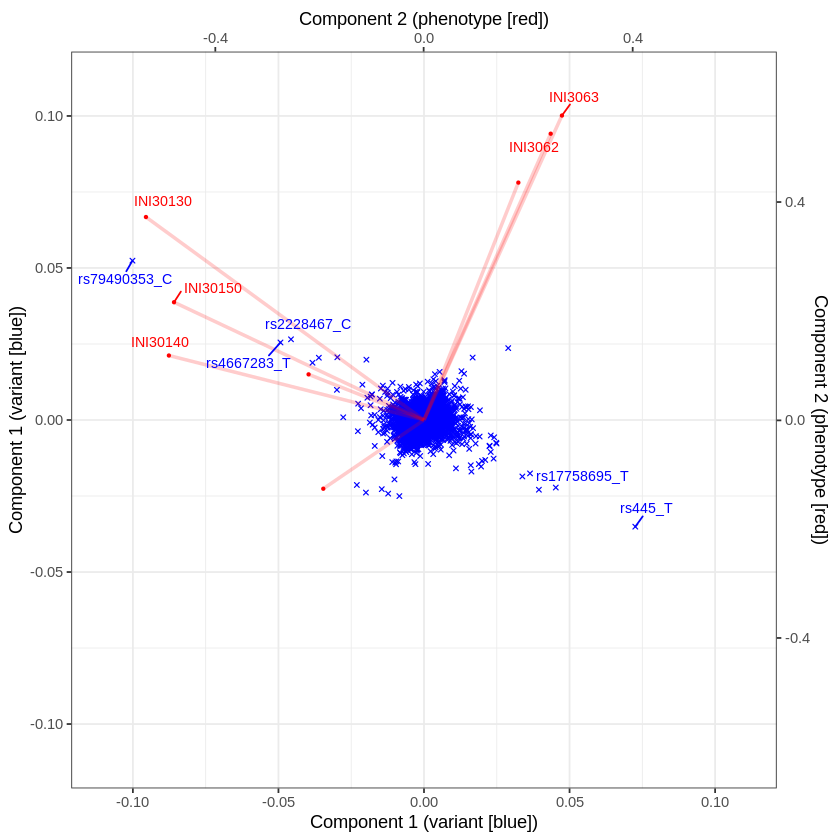

In [6]:
plot_biplot(svd(t(fit$C)), label=label, n_labels=list('phenotype'=5, 'variant'=5), use_ggrepel=TRUE)
